In [ ]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated
from langchain_core.messages import HumanMessage,SystemMessage,BaseMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
import os

In [10]:
load_dotenv()
api_key=os.getenv("GEMINI_API_KEY")
model=ChatGoogleGenerativeAI(google_api_key=api_key,model="gemini-1.5-flash")

In [11]:
model.invoke("HII").content

'Hi there! How can I help you today?'

In [12]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
    messages:Annotated[list[BaseMessage],add_messages]

In [13]:
def message_genrate(state:ChatState):
    message=state['messages']
    response=model.invoke(message).content
    return {'messages':[response]}

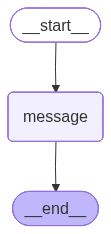

In [17]:

from langgraph.checkpoint.memory import MemorySaver
checkpointer=MemorySaver()
graph=StateGraph(ChatState)

graph.add_node('message',message_genrate)

graph.add_edge(START,'message')
graph.add_edge('message',END)


chatbot=graph.compile(checkpointer=checkpointer)
chatbot

In [ ]:
initial_msg={
    'messages':[HumanMessage(content="What is the capital of india?")]
}
chatbot.invoke(initial_msg)['messages'][-1].content


'The capital of India is **New Delhi**.'

In [19]:
thread_id=1
while True:
    user_msg=input("Input here : ")
    print("user : ",user_msg)
    if user_msg.strip().lower() in ['exit',"quit",'bye']:
        break
    config={'configurable':{'thread_id':thread_id}}
    response=chatbot.invoke({'messages':HumanMessage(content=user_msg)},config=config)
    print("AI : ",response['messages'][-1].content)

# from langchain_core.messages import AIMessage, HumanMessage

# # Initialize a list to hold the conversation history
# conversation_history = []

# while True:
#     user_msg = input("Input here : ")
#     if user_msg.strip().lower() in ['exit', 'quit', 'bye']:
#         break

#     # 1. Add the new user message to our history list
#     conversation_history.append(HumanMessage(content=user_msg))

#     # 2. Invoke the chatbot with the COMPLETE history
#     #    The input to invoke should be the full ChatState dictionary
#     response = chatbot.invoke({'messages': conversation_history})

    # 3. The graph's output contains the full, updated history.
    #    We update our external list to match this.
    #    The last message is the new AI response.
    # conversation_history = response['messages']
    # ai_response = conversation_history[-1].content
    
    # print("AI : ", ai_response)

user :  hi
AI :  Hi there!  How can I help you today?
user :  how are 
AI :  I am doing well, thank you for asking!  How are you?
user :  mu anj
AI :  I'm glad to hear you're doing well!  Is there anything I can help you with today?
user :  bye
